170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, None, None, 512)     │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 652s 925ms/step - accuracy: 0.4569 - loss: 1.5558 - val_accuracy: 0.5724 - val_loss: 1.2236
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 619s 880ms/step - accuracy: 0.5817 - loss: 1.2115 - val_accuracy: 0.5836 - val_loss: 1.1785
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 618s 875ms/step - accuracy: 0.6044 - loss: 1.1309 - val_accuracy: 0.6000 - val_loss: 1.1332
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 620s 881ms/step - accuracy: 0.6198 - loss: 1.0908 - val_accuracy: 0.6122 - val_loss: 1.1186
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 641s 910ms/step - accuracy: 0.6348 - loss: 1.0469 - val_accuracy: 0.6146 - val_loss: 1.1016
313/313 ━━━━━━━━━━━━━━━━━━━━ 127s 406ms/step - accuracy: 0.6092 - loss: 1.1228
Test Loss: 1.1298868656158447
Test Accuracy: 0.6093999743461609
313/313 ━━━━━━━━━━━━━━━━━━━━ 128s 408ms/step
Sample Classification Output:
Test Image 1
Predicted Class: 3
True Class: 3

Test Image 2
Predicted Class: 8
True Class: 8

Test Image 3
Predicted Class: 8
T

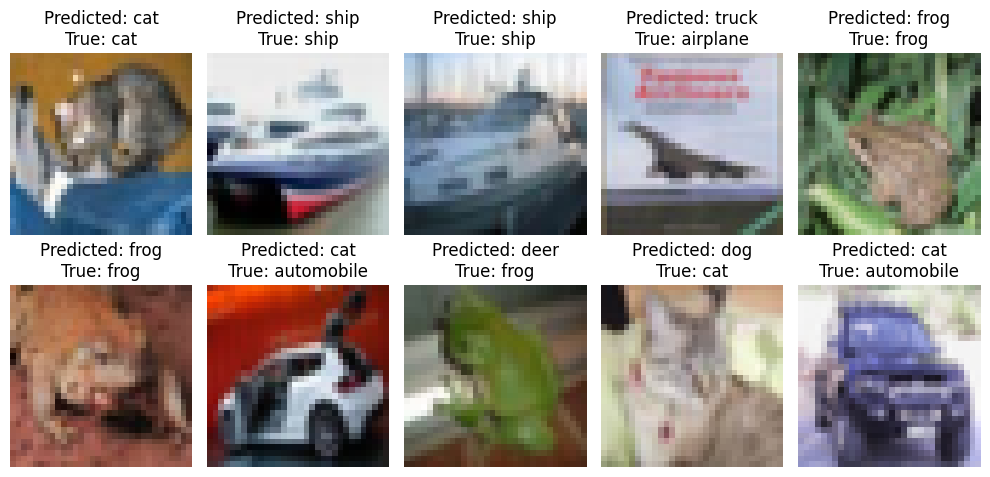

In [ ]:
# prac 8
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Load pretrained VGG16 model without top (fully connected) layers
# The input_shape is already defined in the VGG16 model, no need to specify it again
base_model = VGG16(weights='imagenet', include_top=False)

# Freeze the layers of the pretrained model
for layer in base_model.layers:
    layer.trainable = False


# Create new model on top of the pretrained model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Use GlobalAveragePooling instead of Flatten
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
# This line was missing and is the cause of the error
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict classes for test images
predictions = model.predict(X_test)

# Get the index of the class with the highest probability for each prediction
predicted_classes = np.argmax(predictions, axis=1)

# Display sample classification output
print("Sample Classification Output:")
for i in range(10):  # Display output for the first 10 test images
    print("Test Image", i + 1)
    print("Predicted Class:", predicted_classes[i])
    print("True Class:", np.argmax(y_test[i]))
    print()  # Add empty line for separation

# Define class labels for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display sample images with their predicted and true labels
plt.figure(figsize=(10, 5))
for i in range(10):  # Display images for the first 10 test samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}\nTrue: {class_names[np.argmax(y_test[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
